## Within-subclass variance
Notebook to try and find potential "gradient" genes via looking at axes of variation within subclasses

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestCentroid
import json

In [2]:
# Load data
devData = sc.read("../Data/devData.h5ad")

# Load most up to date cluster codes
clCodes = pd.read_feather("../Data/cluster_results.feather")
clCodes = clCodes.rename(columns={'id': 'sample_id', 'clusterData.cl.result.cl': 'cl'})
clCodes.set_index('sample_id',inplace=True)

# Combine cluster code w/ AnnData object
devData.obs = devData.obs.merge(clCodes,how='inner',left_index=True,right_index=True,validate = "1:1")

# Screen out non-neuronal cells, subset for P14
devData = devData[devData.obs["class_label"] != "Non_neuronal"]
devData = devData[devData.obs["age"] == "P14"]

# Remove genes deemed unsuitable
with open("../Data/badGenes.json", "r") as f:
    badGenes = json.load(f)
    
# Filter from dataset
keepGenes = list(set(devData.var_names) - set(badGenes))
devData = devData[:,keepGenes]

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
# Count number of cells and number of clusters in each subclass
groupby = "subclass_label"
subclassTypes = np.unique(devData.obs[groupby])
gluCounts = pd.DataFrame({'Cell Counts' : [sum(devData.obs[groupby] == name) for name in subclassTypes], 
                          'Cluster Counts' : [len(np.unique(devData[devData.obs[groupby] == name].obs["cl"])) for name in subclassTypes]}, index = subclassTypes)
gluCounts.sort_values('Cluster Counts', ascending=False).head(20)

,Cell Counts,Cluster Counts
Prkcd Grin2c,8667,117
PF_Fzd5,1159,96
Rprml Zim1,1039,89
Rxfp1 Epb4,2406,69
LH_Pou4f1 Sox1,698,68
Gata3 Tal1,582,40
PVT_Fam159b,1453,35
Dlx6os1 Dlx6,543,32
MH_Tac2,2355,29
RT_Isl1,1246,28


In [30]:
"Gabra1" in badGenes

True

In [45]:
devData[:,"Tmem192"]

View of AnnData object with n_obs × n_vars = 20945 × 1
    obs: 'sample_id', 'umi_counts', 'gene_counts', 'sex', 'age', 'donor', 'roi', 'cluster_id', 'cluster_label', 'cluster_color', 'supertype_id', 'supertype_label', 'supertype_color', 'subclass_id', 'subclass_label', 'subclass_color', 'class_id', 'class_label', 'class_color', 'cl'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [40]:
# Look for gene names
# import re
p  = re.compile('Cadm', re.IGNORECASE)
myList = devData.var_names
newList = list(filter(p.search, myList))
newList

['Cadm1', 'Cadm3', 'Cadm2', 'Cadm4', 'Acadm']

## Gata3 Tal1


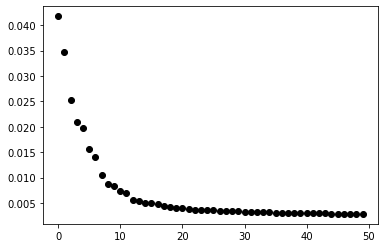

In [5]:
# Copy PF data and perform PCA
rzData = devData[devData.obs["subclass_label"] == "Gata3 Tal1"]
sc.tl.pca(rzData)
plt.plot(rzData.uns["pca"]["variance_ratio"],'ok')

In [185]:
pd.DataFrame({"PC1" : np.abs(rzData.varm['PCs'][:,0]),
              "PC2" : np.abs(rzData.varm['PCs'][:,1]),
              "PC3" : np.abs(rzData.varm['PCs'][:,2])},
             index = rzData.var_names).sort_values('PC2',ascending = False).head(10)

,PC1,PC2,PC3
gene,,,
Zfpm2,0.011526,0.107151,0.069109
Necab1,0.005199,0.097040,0.037980
Gpc5,0.026641,0.092054,0.065599
Otx2os1,0.029975,0.091626,0.057473
Egfem1,0.021806,0.090470,0.025427
Hs3st4,0.021047,0.088013,0.039363
Grik1,0.021005,0.087411,0.059496
Cadps2,0.023883,0.086210,0.032434
Fras1,0.039239,0.086165,0.017094


Text(0.5, 1.0, 'Grik1')

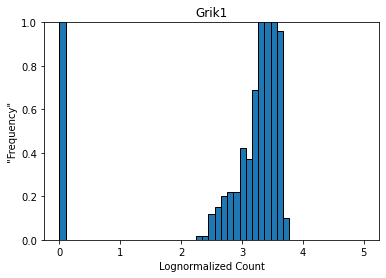

In [6]:
# Plot variance of a single gene
gene = "Grik1"
bins = np.linspace(0,5,50)
plt.hist(rzData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)

## RT_Isl1

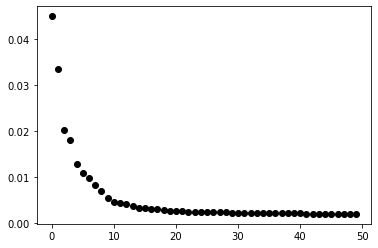

In [149]:
# Copy PF data and perform PCA
rzData = devData[devData.obs["subclass_label"] == "RT_Isl1"]
sc.tl.pca(rzData)
plt.plot(rzData.uns["pca"]["variance_ratio"],'ok')

In [164]:
pd.DataFrame({"PC1" : np.abs(rzData.varm['PCs'][:,0]),
              "PC2" : np.abs(rzData.varm['PCs'][:,1]),
              "PC3" : np.abs(rzData.varm['PCs'][:,2])},
             index = rzData.var_names).sort_values('PC3',ascending = False).head(10)

,PC1,PC2,PC3
gene,,,
Sema6a,0.052890,0.051051,0.078038
Fstl4,0.024888,0.039984,0.074294
Hmcn1,0.013324,0.012255,0.071361
Nr3c2,0.025512,0.019521,0.068701
Lpp,0.021535,0.014370,0.067883
Maml2,0.012945,0.022521,0.067811
Prkd1,0.069813,0.035961,0.066580
Tuba4a,0.010180,0.067435,0.066391
Svil,0.002669,0.019403,0.066330


Text(0.5, 1.0, 'Fstl4')

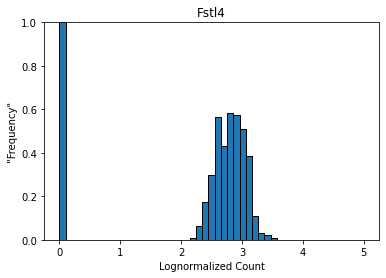

In [172]:
# Plot variance of a single gene
gene = "Fstl4"
bins = np.linspace(0,5,50)
plt.hist(rzData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)

## LH_Pou4f1 Sox1

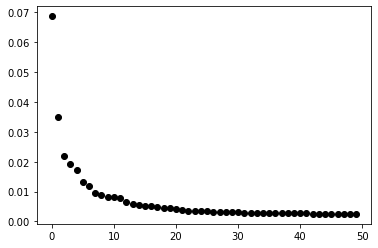

In [119]:
# Copy PF data and perform PCA
rzData = devData[devData.obs["subclass_label"] == "LH_Pou4f1 Sox1"]
sc.tl.pca(rzData)
plt.plot(rzData.uns["pca"]["variance_ratio"],'ok')

In [143]:
pd.DataFrame({"PC1" : np.abs(rzData.varm['PCs'][:,0]),
              "PC2" : np.abs(rzData.varm['PCs'][:,1]),
              "PC3" : np.abs(rzData.varm['PCs'][:,2])},
             index = rzData.var_names).sort_values('PC1',ascending = False).head(10)

,PC1,PC2,PC3
gene,,,
Kcnc1,0.068943,0.011999,0.028820
Cbln1,0.068315,0.004501,0.023428
Dgkg,0.067162,0.023690,0.003877
Arpp21,0.067114,0.036283,0.021566
Kcnc4,0.065846,0.000133,0.001145
Kctd16,0.065780,0.027532,0.019461
Sez6l,0.065639,0.021543,0.025278
C030017B01Rik,0.065610,0.028549,0.008862
Rph3a,0.064985,0.026301,0.002704


Text(0.5, 1.0, 'Rph3a')

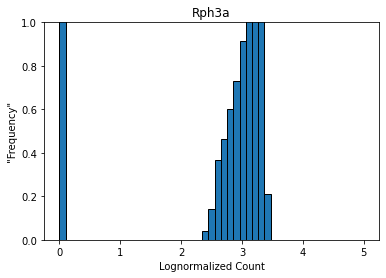

In [148]:
# Plot variance of a single gene
gene = "Rph3a"
bins = np.linspace(0,5,50)
plt.hist(rzData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)

## Rxfp1 Epb4

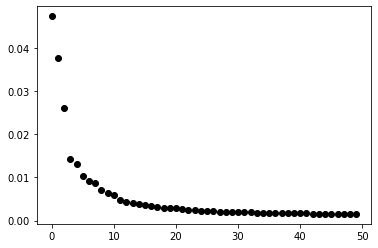

In [100]:
# Copy PF data and perform PCA
rzData = devData[devData.obs["subclass_label"] == "Rxfp1 Epb4"]
sc.tl.pca(rzData)
plt.plot(rzData.uns["pca"]["variance_ratio"],'ok')

In [112]:
pd.DataFrame({"PC1" : np.abs(rzData.varm['PCs'][:,0]),
              "PC2" : np.abs(rzData.varm['PCs'][:,1]),
              "PC3" : np.abs(rzData.varm['PCs'][:,2])},
             index = rzData.var_names).sort_values('PC2',ascending = False).head(10)

,PC1,PC2,PC3
gene,,,
Nrgn,0.010606,0.095677,0.051482
Cntnap5b,0.005097,0.093728,0.025253
Gabrg3,0.039012,0.090810,0.028311
Nkain3,0.049464,0.088112,0.019816
Dgkb,0.042547,0.087752,0.020975
Clmp,0.026289,0.087073,0.050716
Hs3st4,0.034842,0.086434,0.048451
Cacna1e,0.011468,0.086190,0.051298
Gulp1,0.020607,0.085411,0.038570


Text(0.5, 1.0, 'Nrgn')

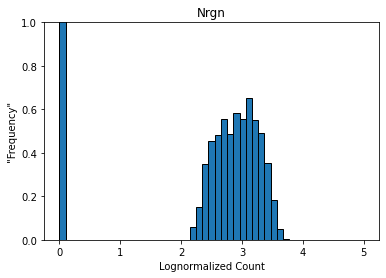

In [118]:
# Plot variance of a single gene
gene = "Nrgn"
bins = np.linspace(0,5,50)
plt.hist(rzData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)

## Rprml Zim1

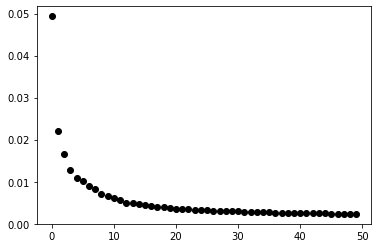

In [81]:
# Copy PF data and perform PCA
rzData = devData[devData.obs["subclass_label"] == "Rprml Zim1"]
sc.tl.pca(rzData)
plt.plot(rzData.uns["pca"]["variance_ratio"],'ok')

In [93]:
pd.DataFrame({"PC1" : np.abs(rzData.varm['PCs'][:,0]),
              "PC2" : np.abs(rzData.varm['PCs'][:,1]),
              "PC3" : np.abs(rzData.varm['PCs'][:,2])},
             index = rzData.var_names).sort_values('PC3',ascending = False).head(10)

,PC1,PC2,PC3
gene,,,
Nfib,0.005958,0.004308,0.086043
Crip2,0.017860,0.037329,0.080392
Nfix,0.003390,0.010600,0.076065
Nfia,0.009144,0.006942,0.070625
Dbi,0.016460,0.023000,0.065134
Nxn,0.008741,0.004026,0.064356
Gm5089,0.000703,0.001831,0.064062
Gm4876,0.006184,0.010330,0.063214
Zic5,0.016254,0.005207,0.063116


Text(0.5, 1.0, 'Nxn')

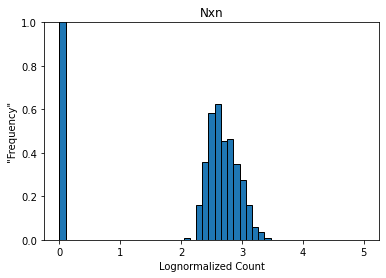

In [99]:
# Plot variance of a single gene
gene = "Nxn"
bins = np.linspace(0,5,50)
plt.hist(rzData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)

## AV_Col27a1	

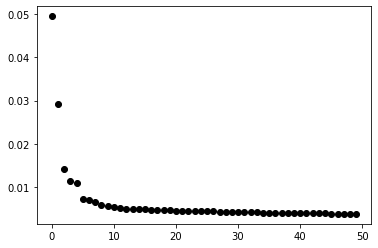

In [6]:
# Copy PF data and perform PCA
avData = devData[devData.obs["subclass_label"] == "AV_Col27a1"]
sc.tl.pca(avData)
plt.plot(avData.uns["pca"]["variance_ratio"],'ok')

Text(0.5, 1.0, 'PC1')

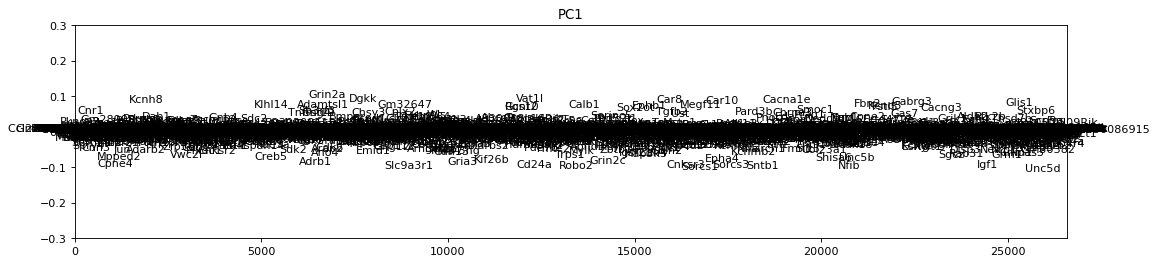

In [7]:
plt.figure(figsize=(16, 12), dpi=80)
ax = plt.subplot(3,1,1)
for i in range(26572):
    ax.text(i, avData.varm['PCs'][i,0], avData.var_names[i], ha='center', size=10)
plt.xlim(0,26572)
plt.ylim(-.3, .3)
plt.title('PC1')

In [19]:
pd.DataFrame({"PC1" : np.abs(avData.varm['PCs'][:,0]),
              "PC2" : np.abs(avData.varm['PCs'][:,1]),
              "PC3" : np.abs(avData.varm['PCs'][:,2])},
             index = avData.var_names).sort_values('PC1',ascending = False).head(10)

,PC1,PC2,PC3
gene,,,
Unc5d,0.112262,0.018234,0.093742
Sorcs1,0.105846,0.041766,0.021697
Slc9a3r1,0.104140,0.046392,0.034255
Sntb1,0.103217,0.032999,0.043957
Nfib,0.102903,0.018820,0.046915
Robo2,0.102236,0.034186,0.034001
Igf1,0.101784,0.037725,0.040353
Cnksr3,0.101059,0.011020,0.042663
Sorcs3,0.100123,0.010219,0.032905


Text(0.5, 1.0, 'Igf1')

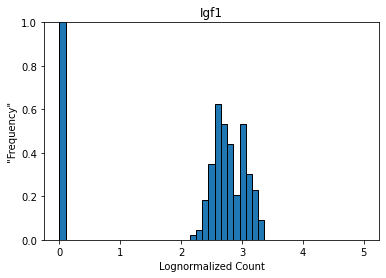

In [24]:
# Plot variance of a single gene
gene = "Igf1"
bins = np.linspace(0,5,50)
plt.hist(avData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)

## PF_Fzd5

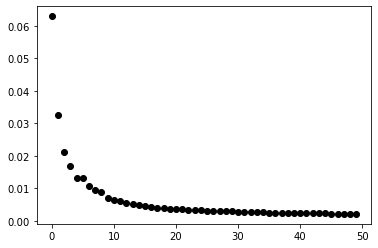

In [25]:
# Copy PF data and perform PCA
pfData = devData[devData.obs["subclass_label"] == "PF_Fzd5"]
sc.tl.pca(pfData)
plt.plot(pfData.uns["pca"]["variance_ratio"],'ok')

Text(0.5, 1.0, 'PC3')

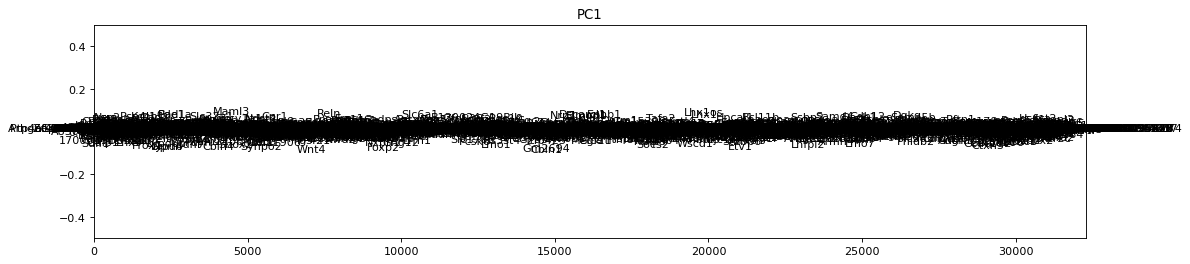

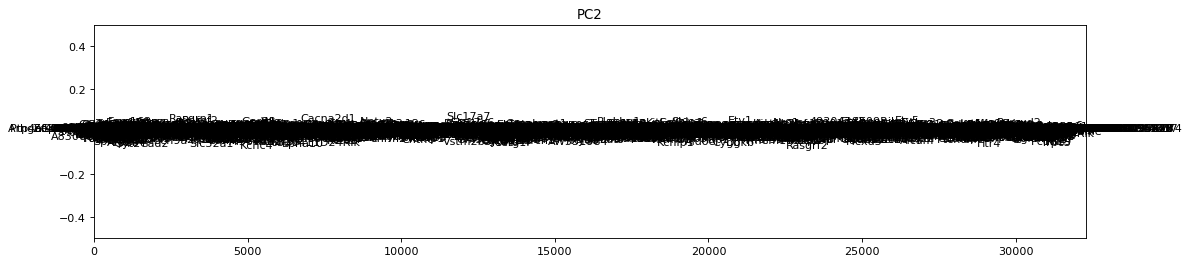

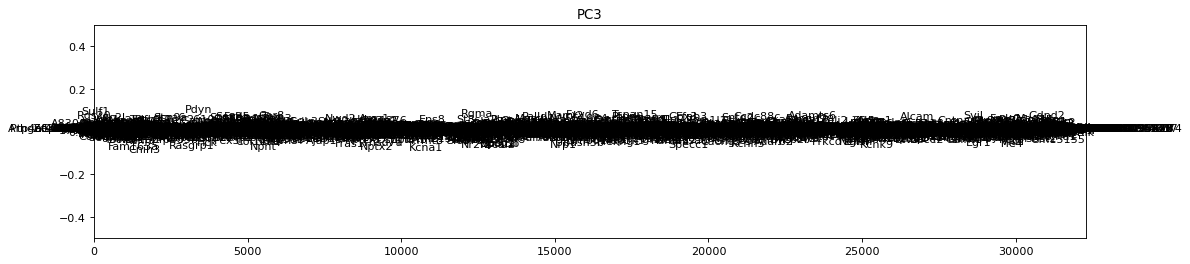

In [110]:
plt.figure(figsize=(16, 12), dpi=80)
ax = plt.subplot(3,1,1)
for i in range(26572):
    ax.text(i, pfData.varm['PCs'][i,0], pfData.var_names[i], ha='center', size=10)
plt.xlim(0,26572)
plt.ylim(-.2, .2)
plt.title('PC1')

In [44]:
pd.DataFrame({"PC1" : np.abs(pfData.varm['PCs'][:,0]),
              "PC2" : np.abs(pfData.varm['PCs'][:,1]),
              "PC3" : np.abs(pfData.varm['PCs'][:,2])},
             index = pfData.var_names).sort_values('PC2',ascending = False).head(10)

,PC1,PC2,PC3
gene,,,
Kcnc4,0.011699,0.083682,0.012767
Rasgrf2,0.014357,0.078885,0.035588
Atp2b4,0.012440,0.072599,0.017192
Gad2,0.068668,0.069885,0.037648
Cygb,0.023493,0.069164,0.009129
Fxyd6,0.024107,0.067645,0.072276
Dgkb,0.016397,0.065890,0.011399
Slc32a1,0.071460,0.065806,0.038035
Epha10,0.019232,0.065334,0.010127


Text(0.5, 1.0, 'Slc32a1')

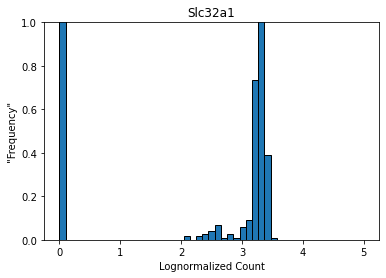

In [49]:
# Plot variance of a single gene
gene = "Slc32a1"
bins = np.linspace(0,5,50)
plt.hist(pfData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)

## Prkcd Grin2c

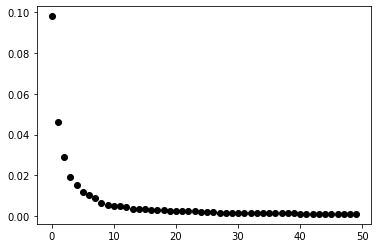

In [50]:
# Copy PRKCD data and perform PCA
prkcdData = devData[devData.obs["subclass_label"] == "Prkcd Grin2c"]
sc.tl.pca(prkcdData)
plt.plot(prkcdData.uns["pca"]["variance_ratio"],'ok')

Text(0.5, 1.0, 'PC3')

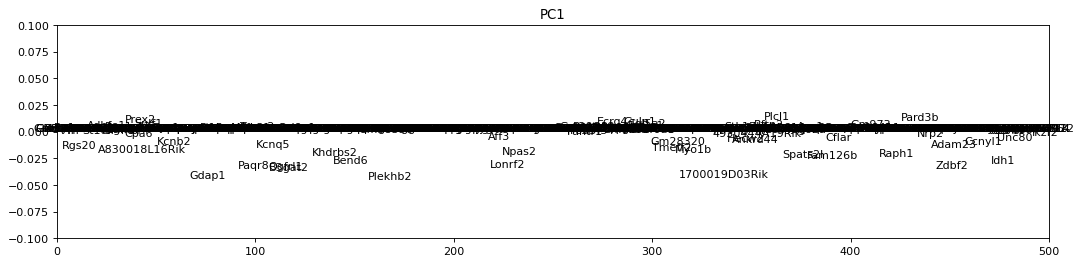

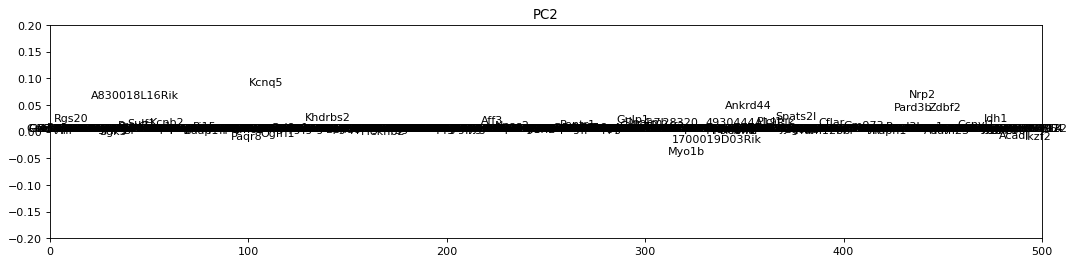

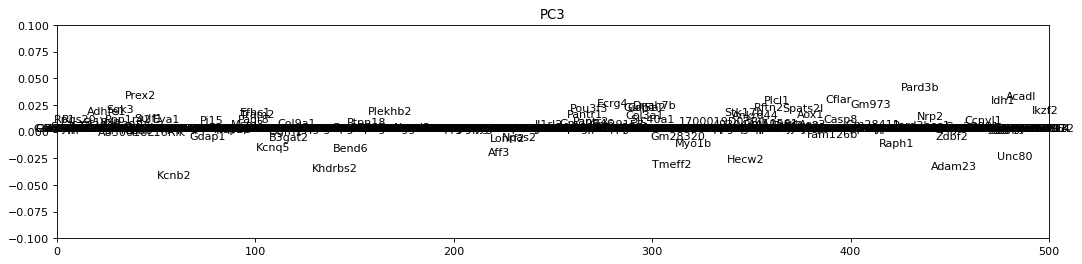

In [71]:
plt.figure(figsize=(16, 12), dpi=80)
ax = plt.subplot(3,1,1)
for i in range(26572):
    ax.text(i, prkcdData.varm['PCs'][i,0], prkcdData.var_names[i], ha='center', size=10)
plt.xlim(0,26572)
plt.ylim(-.1, .1)
plt.title('PC1')

In [78]:
pd.DataFrame({"PC1" : np.abs(prkcdData.varm['PCs'][:,0]),
              "PC2" : np.abs(prkcdData.varm['PCs'][:,1]),
              "PC3" : np.abs(prkcdData.varm['PCs'][:,2]),
              "PC4" : np.abs(prkcdData.varm['PCs'][:,3])},
             index = prkcdData.var_names).sort_values('PC2',ascending = False).head(10)

,PC1,PC2,PC3,PC4
gene,,,,
Stxbp5l,0.009060,0.095371,0.018962,0.047396
Prkcd,0.013872,0.092618,0.010213,0.036603
Rmst,0.011325,0.089055,0.001947,0.010719
Fam81a,0.033612,0.087406,0.009343,0.000638
Kcnq5,0.017846,0.086933,0.019668,0.047558
Rasgrf2,0.023015,0.086379,0.011935,0.029706
Kcnt2,0.023393,0.082406,0.020984,0.020352
Thsd7b,0.010887,0.080581,0.011215,0.006011
Cep112,0.015003,0.079572,0.007509,0.063987


Text(0.5, 1.0, 'Thsd7b')

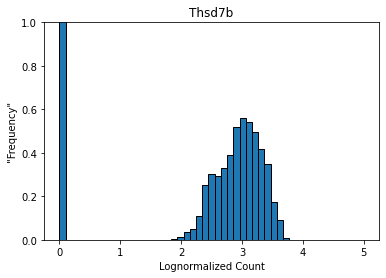

In [80]:
# Plot variance of a single gene
gene = "Thsd7b"
bins = np.linspace(0,5,50)
plt.hist(prkcdData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
plt.xlabel('Lognormalized Count')
plt.ylabel('"Frequency"')
plt.ylim(0,1)
plt.title(gene)